# Import Data

In [1]:
import yfinance as yf
import pandas as pd

In [2]:
start = '2023-11-12' #'2023-10-31'
end = '2023-12-29'
df_15m = yf.download("ERW.BK", start=start, end=end, interval='15m')
#df_15m = yf.download("TISCO.BK", start=start, end=end, interval='15m')
#df_15m = yf.download("SPRC.BK", start=start, end=end, interval='15m')
df_15m = df_15m.reset_index()

start = '2023-01-01'
end = '2023-11-11' #'2023-10-30'
df_1h = yf.download("ERW.BK", start=start, end=end, period="1y", interval='1h')
#df_1h = yf.download("TISCO.BK", start=start, end=end, period="1y", interval='1h')
#df_1h = yf.download("SPRC.BK", start=start, end=end, period="1y", interval='1h')
df_1h = df_1h.reset_index()
df_1h['Datetime'] = df_1h['Datetime'].dt.tz_localize(None)

df = pd.concat([df_1h, df_15m], ignore_index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03 10:00:00,4.56,4.58,4.52,4.56,4.56,0
1,2023-01-03 11:00:00,4.56,4.58,4.54,4.56,4.56,2061275
2,2023-01-03 12:00:00,4.56,4.56,4.54,4.56,4.56,1010500
3,2023-01-03 14:00:00,4.56,4.58,4.54,4.56,4.56,1642700
4,2023-01-03 15:00:00,4.56,4.60,4.54,4.56,4.56,5572100
...,...,...,...,...,...,...,...
1869,2023-12-28 15:15:00,5.30,5.30,5.30,5.30,5.30,101604
1870,2023-12-28 15:30:00,5.30,5.30,5.25,5.25,5.25,119900
1871,2023-12-28 15:45:00,5.25,5.30,5.25,5.25,5.25,76418
1872,2023-12-28 16:00:00,5.25,5.30,5.20,5.25,5.25,1122200


In [4]:
# df.to_parquet('tmp_data.parquet', index=False)
# df = pd.read_parquet('tmp_data.parquet')

# Event

In [5]:
from datetime import date
import holidays
from holidays import financial_holidays

In [6]:
for date, name in sorted(financial_holidays('NYSE',years=2023).items()):
    print(date, name)
#holidays.US(years=2023)
#financial_holidays('NYSE',years=2023)
#holidays.TH(years=2023)

2023-01-02 New Year's Day (Observed)
2023-01-16 Martin Luther King Jr. Day
2023-02-20 Washington's Birthday
2023-04-07 Good Friday
2023-05-29 Memorial Day
2023-06-19 Juneteenth National Independence Day
2023-07-04 Independence Day
2023-09-04 Labor Day
2023-11-23 Thanksgiving Day
2023-12-25 Christmas Day


In [7]:
holidayth = pd.DataFrame({
  'holiday': 'holidayTH',
  'ds': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03',
                        '2023-01-14', '2023-03-06', '2023-04-06',
                        '2023-04-13', '2023-04-13', '2023-04-14',
                        '2023-04-15', '2023-04-17', '2023-05-01',
                        '2023-05-04', '2023-05-05', '2023-06-03',
                        '2023-06-05', '2023-07-28', '2023-07-31',
                        '2023-08-01', '2023-08-12', '2023-08-14',
                        '2023-10-13', '2023-10-23', '2023-12-05',
                        '2023-12-10', '2023-12-11', '2023-12-29',
                        '2023-12-31']),
  'lower_window': 0,
  'upper_window': 1,
})

political_day = pd.DataFrame({
  'holiday': 'political_day',
  'ds': pd.to_datetime(['2023-02-22', '2023-03-10', '2023-03-20',
                        '2023-02-22', '2023-03-10', '2023-03-20',
                        '2023-03-22', '2023-04-14', '2023-04-18',
                        '2023-04-22', '2023-04-23', '2023-04-29',
                        '2023-07-03', '2023-07-10', '2023-07-11',
                        '2023-07-12', '2023-07-13', '2023-07-14',
                        '2023-07-15', '2023-07-16', '2023-07-19',
                        '2023-07-23', '2023-07-29', '2023-08-02',
                        '2023-08-03', '2023-08-06', '2023-08-12',
                        '2023-08-22', '2023-08-23', '2023-08-24',
                        '2023-08-31', '2023-09-01', '2023-09-10',
                        '2023-09-26', '2023-10-03', '2023-10-07',
                        '2023-10-09', '2023-12-04', '2023-12-05',
                        '2023-12-13', '2023-12-20']),
  'lower_window': 0,
  'upper_window': 1,
})

financial_us = pd.DataFrame({
  'holiday': 'financial_us',
  'ds': pd.to_datetime(['2023-01-02', '2023-01-16', '2023-02-20',
                        '2023-04-07', '2023-05-29', '2023-06-19',
                        '2023-07-04', '2023-09-04', '2023-11-23',
                        '2023-12-25'      
                        ]),
  'lower_window': 0,
  'upper_window': 1,
})


holiday_us = pd.DataFrame({
  'holiday': 'holidayus',
  'ds': pd.to_datetime(['2023-01-16', '2023-02-20', '2023-05-29',
                        '2023-06-19', '2023-07-04', '2023-09-04',
                        '2023-10-09', '2023-11-10', '2023-11-11',
                        '2023-11-23'      
                        ]),
  'lower_window': 0,
  'upper_window': 1,
})



In [8]:
set_ewd = pd.DataFrame({
  'holiday': 'set_ewd',
  'ds': pd.to_datetime(['2023-02-15', '2023-02-21', '2023-03-23',
                        '2023-04-25', '2023-05-09', '2023-05-15',
                        '2023-05-29', '2023-08-15', '2023-08-25',
                        '2023-09-04', '2023-09-04', '2023-09-15',
                        '2023-10-30', '2023-11-14', '2023-11-15',
                        '2023-12-25']),
  'lower_window': 0,
  'upper_window': 1,
})


In [9]:
set_tisco = pd.DataFrame({
  'holiday': 'set_tisco',
  'ds': pd.to_datetime(['2023-01-03', '2023-01-16', '2023-02-01',
                        '2023-02-13', '2023-02-13', '2023-02-21',
                        '2023-02-23', '2023-03-01', '2023-03-09',
                        '2023-03-13', '2023-03-17', '2023-03-31',
                        '2023-04-17', '2023-04-18', '2023-04-19',
                        '2023-04-27', '2023-04-28', '2023-05-12',
                        '2023-06-01', '2023-06-13', '2023-07-12',
                        '2023-07-31', '2023-08-11', '2023-08-15',
                        '2023-08-24', '2023-08-25', '2023-08-30',
                        '2023-09-07', '2023-09-12', '2023-09-29',
                        '2023-10-11', '2023-11-01', '2023-11-13',
                        '2023-11-14', '2023-12-6', '2023-12-13'
                       ]),
  'lower_window': 0,
  'upper_window': 1,
})

In [10]:
set_sprc = pd.DataFrame({
  'holiday': 'set_sprc',
  'ds': pd.to_datetime(['2023-01-17', '2023-01-31', '2023-02-14',
                        '2023-02-24', '2023-03-03', '2023-03-28',
                        '2023-04-05', '2023-04-19', '2023-05-10',
                        '2023-08-04', '2023-08-08', '2023-09-01',
                        '2023-09-07', '2023-09-26', '2023-10-05',
                        '2023-10-09', '2023-10-17', '2023-10-19',
                        '2023-11-06', '2023-11-08'
                       ]),
  'lower_window': 0,
  'upper_window': 1,
})

In [11]:
inte_date = pd.concat((holidayth,political_day,holiday_us,financial_us,set_ewd))
#set_tisco,set_sprc

In [12]:
inte_date

,holiday,ds,lower_window,upper_window
0,holidayTH,2023-01-01,0,1
1,holidayTH,2023-01-02,0,1
2,holidayTH,2023-01-03,0,1
3,holidayTH,2023-01-14,0,1
4,holidayTH,2023-03-06,0,1
...,...,...,...,...
11,set_ewd,2023-09-15,0,1
12,set_ewd,2023-10-30,0,1
13,set_ewd,2023-11-14,0,1
14,set_ewd,2023-11-15,0,1


# Prep data

In [13]:
df_prep = df.copy()
df_prep2=df.copy()

In [14]:
tgt_df = pd.DataFrame()
tgt_df['ds'] = df_prep['Datetime']
tgt_df['y'] = df_prep['Close']
tgt_df

,ds,y
0,2023-01-03 10:00:00,4.56
1,2023-01-03 11:00:00,4.56
2,2023-01-03 12:00:00,4.56
3,2023-01-03 14:00:00,4.56
4,2023-01-03 15:00:00,4.56
...,...,...
1869,2023-12-28 15:15:00,5.30
1870,2023-12-28 15:30:00,5.25
1871,2023-12-28 15:45:00,5.25
1872,2023-12-28 16:00:00,5.25


# Model part

In [15]:
from prophet import Prophet
import datetime

m = Prophet(holidays=inte_date)
m.fit(tgt_df)

c:\Users\Wanlipa\Desktop\ML_Final\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
19:01:04 - cmdstanpy - INFO - Chain [1] start processing
19:01:05 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
future = m.make_future_dataframe(periods=4*72 ,freq='15T' ,include_history=False)
future.tail()

forecast = m.predict(future)

# forecast = m.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
283,2023-12-31 15:15:00,5.040541,4.920612,5.166231
284,2023-12-31 15:30:00,5.041449,4.926829,5.162659
285,2023-12-31 15:45:00,5.042816,4.915331,5.169585
286,2023-12-31 16:00:00,5.045403,4.923647,5.168191
287,2023-12-31 16:15:00,5.050223,4.933777,5.182284


In [17]:
# filter out unused
forecast = forecast[(forecast['ds'].dt.time>=datetime.time(10,0,0)) & (forecast['ds'].dt.time<=datetime.time(16,30,0))]

c:\Users\Wanlipa\Desktop\ML_Final\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Wanlipa\Desktop\ML_Final\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


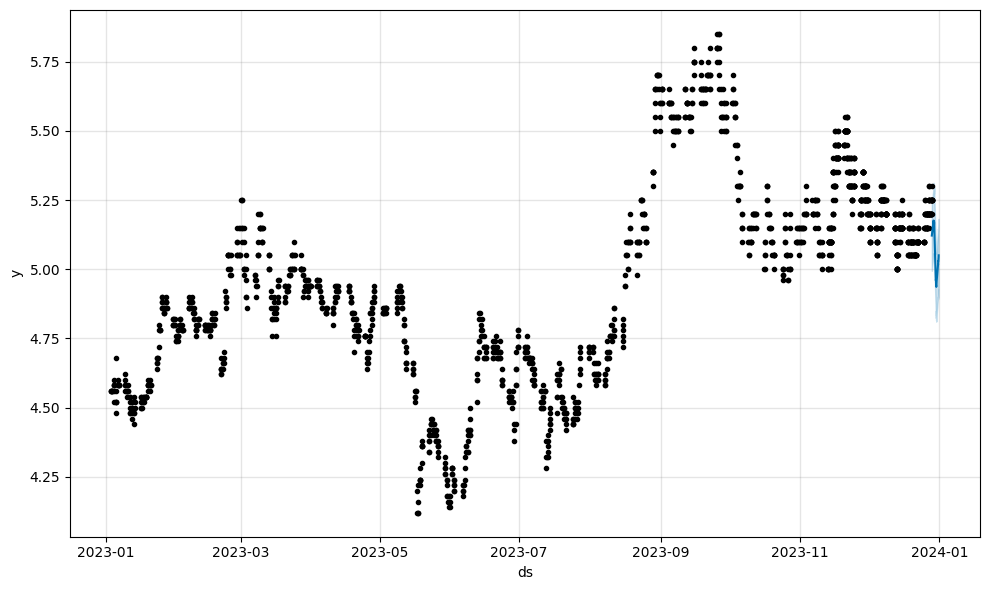

In [18]:
fig1 = m.plot(forecast)

c:\Users\Wanlipa\Desktop\ML_Final\.venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Wanlipa\Desktop\ML_Final\.venv\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
c:\Users\Wanlipa\Desktop\ML_Final\.venv\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead 

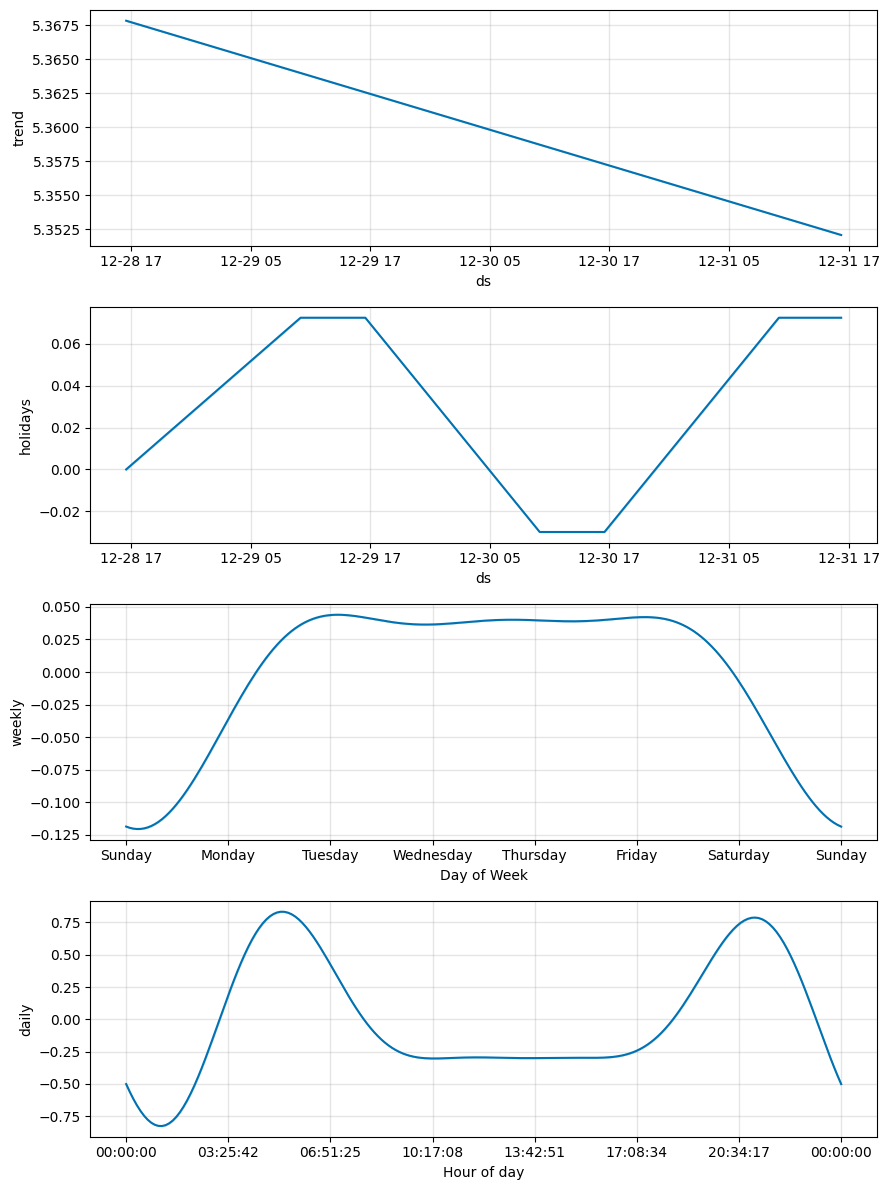

In [19]:
fig2 = m.plot_components(forecast)

In [20]:
# forecast.to_excel('tmp.xlsx', index=False)

# Holiday Effects

In [21]:
m2 = Prophet(holidays=inte_date, holidays_prior_scale=0.05).fit(tgt_df)
forecast2 = m2.predict(future)
forecast2[(forecast2['political_day']+forecast2['set_ewd']).abs() > 0][['ds', 'political_day','set_ewd']][-10:]
forecast2[['ds','political_day','set_ewd','yhat']]

19:01:06 - cmdstanpy - INFO - Chain [1] start processing
19:01:07 - cmdstanpy - INFO - Chain [1] done processing


,ds,political_day,set_ewd,yhat
0,2023-12-28 16:30:00,0.0,0.0,5.121255
1,2023-12-28 16:45:00,0.0,0.0,5.132764
2,2023-12-28 17:00:00,0.0,0.0,5.150354
3,2023-12-28 17:15:00,0.0,0.0,5.175388
4,2023-12-28 17:30:00,0.0,0.0,5.209072
...,...,...,...,...
283,2023-12-31 15:15:00,0.0,0.0,5.041063
284,2023-12-31 15:30:00,0.0,0.0,5.041974
285,2023-12-31 15:45:00,0.0,0.0,5.043338
286,2023-12-31 16:00:00,0.0,0.0,5.045889


In [22]:
#forecast2.to_excel('tmp2.xlsx', index=False)

# Prep data for train and test

In [23]:
#Split data 
split_df = pd.DataFrame()
split_df['ds'] = df_prep2['Datetime']
split_df['y'] = df_prep2['Close']
split_df

,ds,y
0,2023-01-03 10:00:00,4.56
1,2023-01-03 11:00:00,4.56
2,2023-01-03 12:00:00,4.56
3,2023-01-03 14:00:00,4.56
4,2023-01-03 15:00:00,4.56
...,...,...
1869,2023-12-28 15:15:00,5.30
1870,2023-12-28 15:30:00,5.25
1871,2023-12-28 15:45:00,5.25
1872,2023-12-28 16:00:00,5.25


In [24]:
train = split_df[split_df['ds'] < pd.Timestamp('2023-12-25')]
test = split_df[split_df['ds'] >= pd.Timestamp('2023-12-25')]

print(f"Number of months in train data: {len(train)}")
print(f"Number of months in test data: {len(test)}")



Number of months in train data: 1798
Number of months in test data: 76


In [25]:
#Train
m3 = Prophet(holidays=inte_date)
m3.fit(train)

19:01:07 - cmdstanpy - INFO - Chain [1] start processing
19:01:08 - cmdstanpy - INFO - Chain [1] done processing


# RMSE

c:\Users\Wanlipa\Desktop\ML_Final\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Wanlipa\Desktop\ML_Final\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


,ds,yhat,yhat_lower,yhat_upper
283,2023-12-25 15:15:00,5.071618,4.941384,5.196530
284,2023-12-25 15:30:00,5.071512,4.933600,5.190037
285,2023-12-25 15:45:00,5.072132,4.944695,5.201864
286,2023-12-25 16:00:00,5.074368,4.951550,5.210836
287,2023-12-25 16:15:00,5.079359,4.949033,5.204056


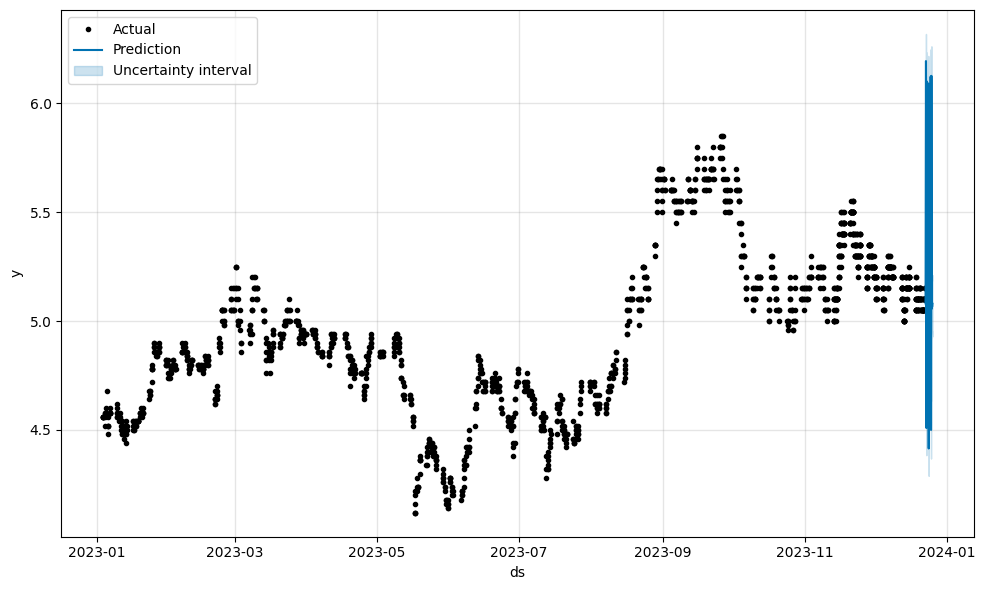

In [26]:
import matplotlib.pyplot as plt
future3 = m3.make_future_dataframe(periods=4*72 ,freq='15T' ,include_history=False)
#72 = 3 days
forecast3 = m3.predict(future3)

fig3 = m3.plot(forecast3)
# plt.show()
plt.legend(['Actual', 'Prediction', 'Uncertainty interval'])
forecast3[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

In [27]:
forecast3 = forecast3.set_index('ds')[['yhat']]
test = test.set_index('ds')[['y']]
test_result = forecast3.join(test).dropna()

In [28]:
test_result = forecast3.join(test).dropna()
test_result.tail()

,yhat,y
ds,,
2023-12-25 15:15:00,5.071618,5.20
2023-12-25 15:30:00,5.071512,5.20
2023-12-25 15:45:00,5.072132,5.20
2023-12-25 16:00:00,5.074368,5.25
2023-12-25 16:15:00,5.079359,5.25


In [29]:
import math

# Normalization
max_val = max(test_result['yhat'].max(), test_result['y'].max())
min_val = min(test_result['yhat'].min(), test_result['y'].min())

# fit
test_result['yhat'] = (test_result['yhat'] - min_val)/(max_val-min_val)
test_result['y'] = (test_result['y'] - min_val)/(max_val-min_val)

test_result['diff_sq'] = (test_result['yhat'] - test_result['y'])**2
avg_err = test_result['diff_sq'].sum()/test_result.shape[0]
rmse_val = math.sqrt(avg_err)

print('RMSE =', rmse_val)


RMSE = 0.5205588091944788


# AUC

In [30]:
auc_df = test_result[['yhat', 'y']]

In [31]:
# Rule base
auc_df['yhat_class'] = (auc_df['yhat'] < auc_df['yhat'].shift(-1, fill_value=1)).map({True: 1, False:-1}) #buy = 1
auc_df['y_class'] = (auc_df['y'] < auc_df['y'].shift(-1, fill_value=1)).map({True: 1, False:-1})

In [32]:
from sklearn import metrics
jitter_thr = 1/(auc_df.shape[0]*2)

auc_df['yhat_class_cal'] = auc_df['yhat_class']
cnt = 1
for i, r in auc_df.iterrows():
    if r['yhat_class'] > 0:
        auc_df.loc[i, 'yhat_class_cal'] -= cnt * jitter_thr
    else:
        auc_df.loc[i, 'yhat_class_cal'] += cnt * jitter_thr
    cnt += 1

fpr, tpr, thresholds = metrics.roc_curve(auc_df['y_class'], auc_df['yhat_class_cal'].values, pos_label=1)
print('AUC Score =', metrics.auc(fpr, tpr))

AUC Score = 0.6666666666666667


C:\Users\Wanlipa\AppData\Local\Temp\ipykernel_28688\1023289582.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-0.9736842105263158' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  auc_df.loc[i, 'yhat_class_cal'] += cnt * jitter_thr


In [33]:
auc_df.head(72)

,yhat,y,yhat_class,y_class,yhat_class_cal
ds,,,,,
2023-12-25 10:00:00,0.004151,0.221376,-1,-1,-0.973684
2023-12-25 10:15:00,0.000000,0.221376,1,1,0.947368
2023-12-25 10:30:00,0.007691,0.480918,1,-1,0.921053
2023-12-25 10:45:00,0.021209,0.221376,1,-1,0.894737
2023-12-25 11:00:00,0.035891,0.221376,1,-1,0.868421
2023-12-25 11:15:00,0.048525,0.221376,1,-1,0.842105
2023-12-25 11:30:00,0.057310,0.221376,1,1,0.815789
2023-12-25 11:45:00,0.061696,0.480918,1,-1,0.789474
2023-12-25 12:00:00,0.062128,0.480918,-1,-1,-0.763158


In [34]:
auc_df.to_excel('output.xlsx', index=False)